In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import accuracy_score
%matplotlib inline

In [3]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz2.38\bin'# (укажите свой путь до bin для graphviz)
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70%; !important;}</style>"
HTML(style)

In [4]:
mobiles_train = pd.read_csv('train.csv')
mobiles_test = pd.read_csv('test.csv')

In [5]:
mobiles_test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [6]:
mobiles_train = mobiles_train.rename({'clock_speed':'microprocess_speed', 'fc':'front_cam', 'int_memory':"intern_memory",\
                    'm_dep':'mobile_depth', 'mobile_wt':'mobile_weight', 'pc':'primary camera'}, axis=1)
mobiles_test = mobiles_test.rename({'clock_speed':'microprocess_speed', 'fc':'front_cam', 'int_memory':"intern_memory", \
                    'm_dep':'mobile_depth', 'mobile_wt':'mobile_weight', 'pc':'primary camera'}, axis=1)
mobiles_train.head()

,battery_power,blue,microprocess_speed,dual_sim,front_cam,four_g,intern_memory,mobile_depth,mobile_weight,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


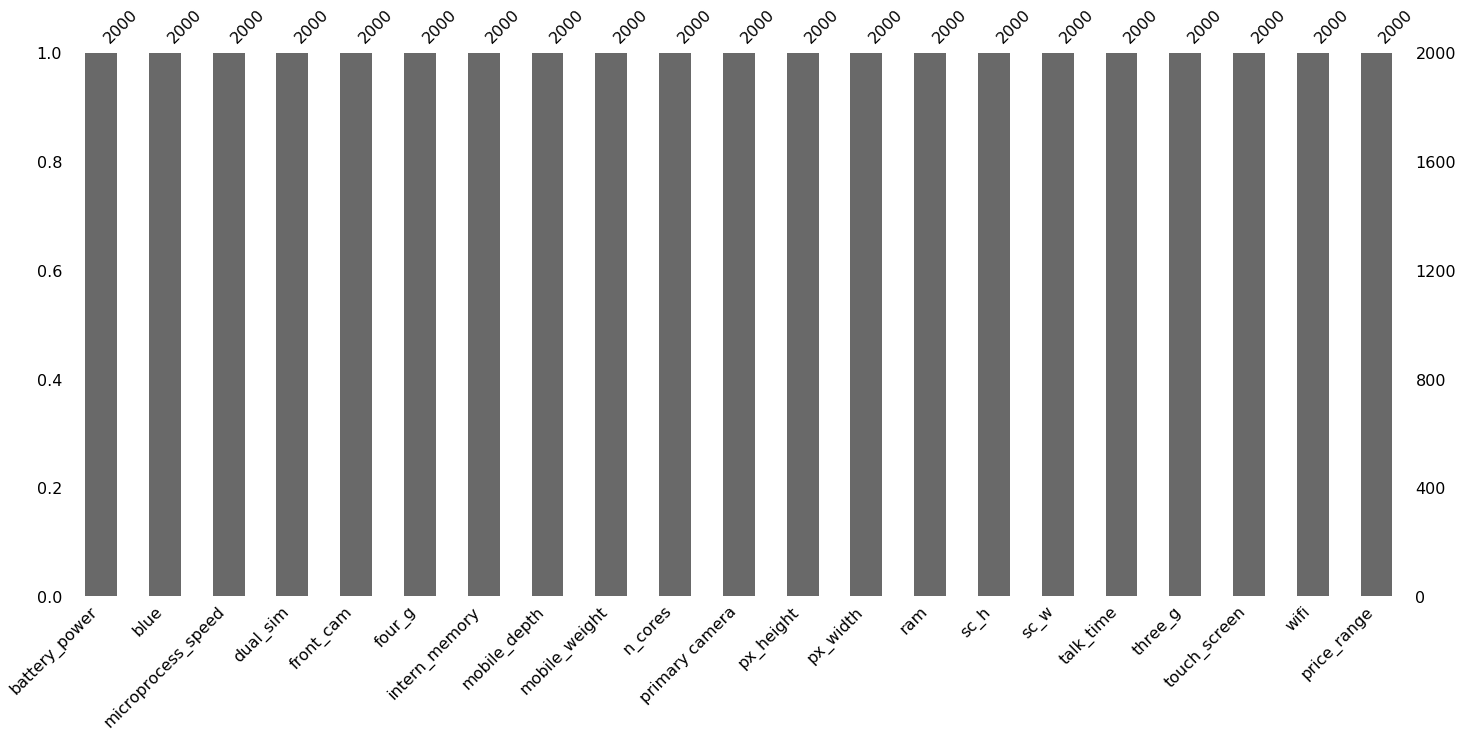

In [7]:
import missingno as msno # проверить нет ли пропущенных значений в датафрейме
import matplotlib.pyplot as plt
msno.bar(mobiles_train)
plt.show()

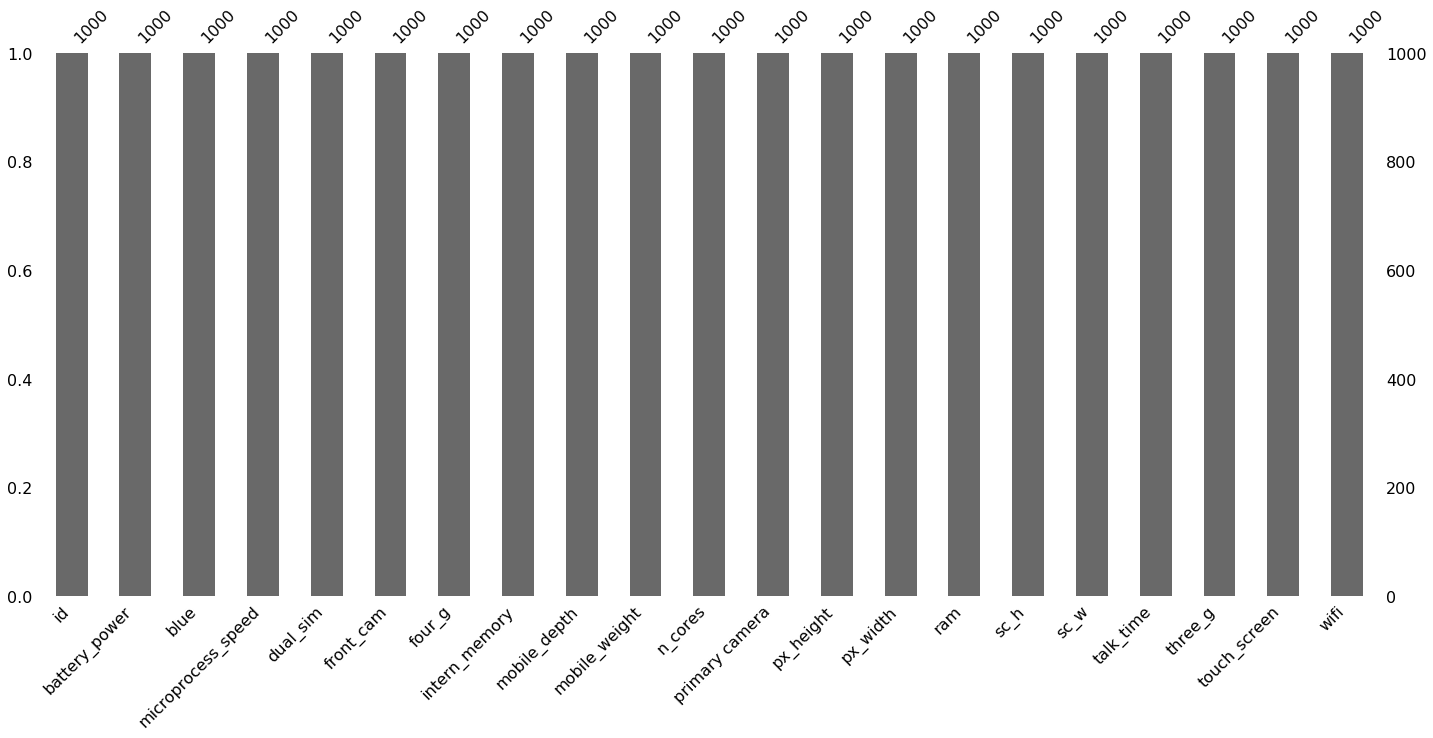

In [8]:
msno.bar(mobiles_test)
plt.show()

In [9]:
#проверим сбалансированность классов
mobiles_train.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

классы сбалансированы,поэтому можно и accuracy оценить точность

<function matplotlib.pyplot.show(*args, **kw)>

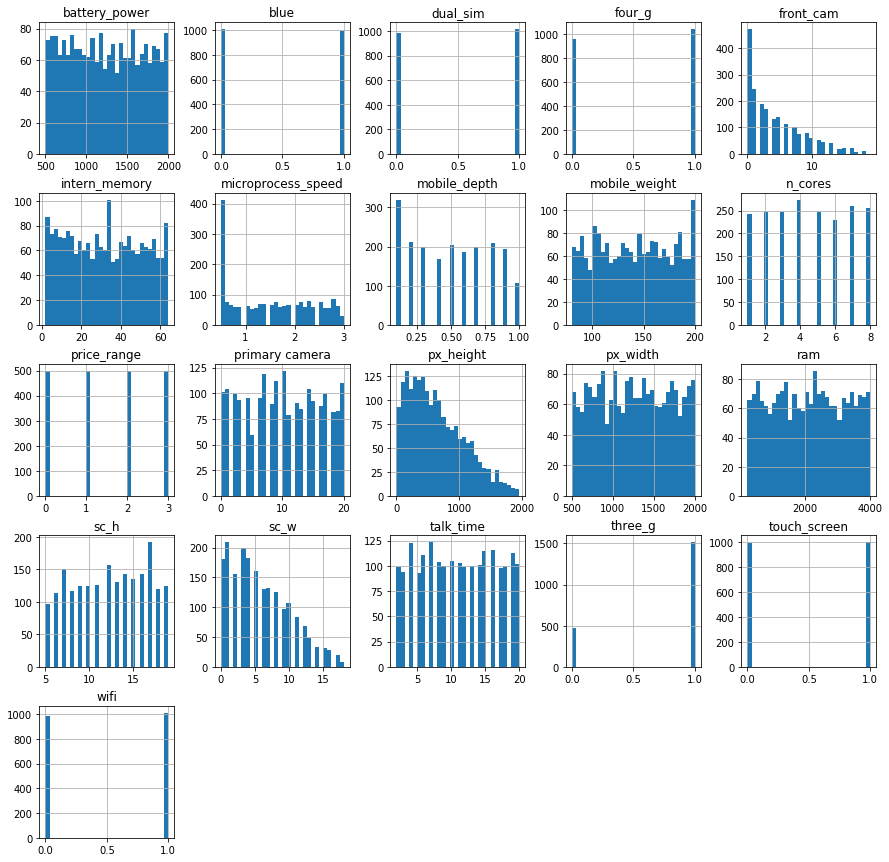

In [10]:
## EDA
# Distribution
mobiles_train.hist(bins=30, figsize=(15, 15))
plt.show

Здесь у нас есть график распределения для каждого столбца, несколько столбцов распределяются равномерно, как Dual SIM, Bluetooth, диапазон цен, Wi-Fi и сенсорный экран. Остальные распределены случайным образом.
теперь изучим корреляции


Text(0.5, 1, 'Correlation ')

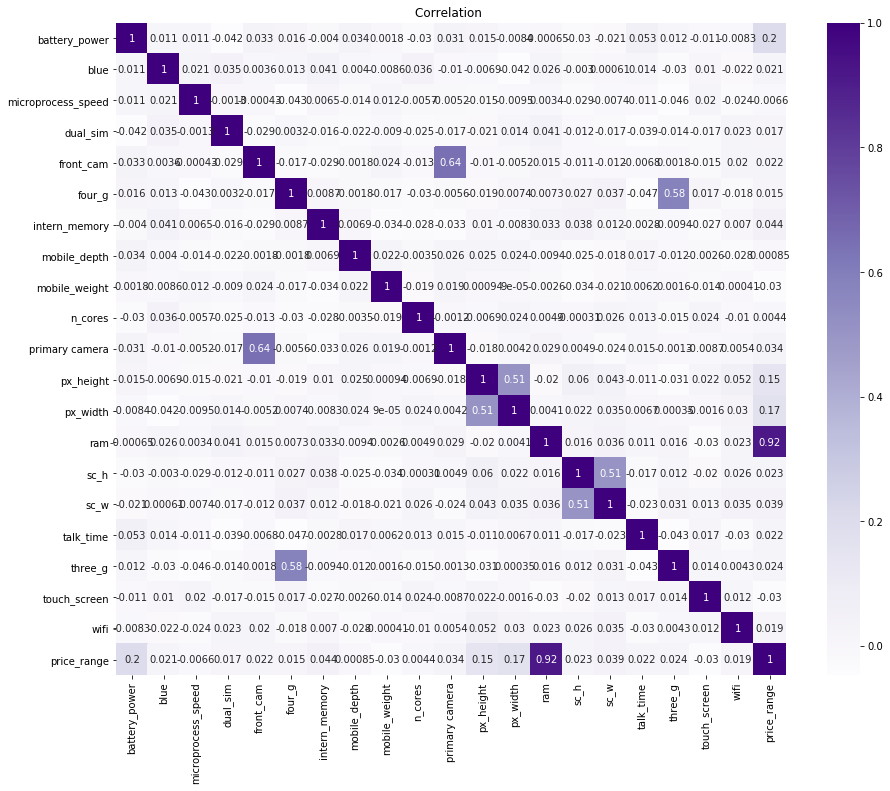

In [11]:
corr = mobiles_train.corr()
fig = plt.figure(figsize=(15, 12))
r = sns.heatmap(corr, cmap='Purples', annot=True)
r.set_title("Correlation ")

мы видим сильную коррелляцию между ram и ценой мобилы 0,92

In [12]:
# Most important feature

Corr = mobiles_train.corr()

IF = Corr['price_range'].sort_values(ascending=False).head(10).to_frame()
IF.head(10)

,price_range
price_range,1.000000
ram,0.917046
battery_power,0.200723
px_width,0.165818
px_height,0.148858
intern_memory,0.044435
sc_w,0.038711
primary camera,0.033599
three_g,0.023611
sc_h,0.022986


как мы видим, первые пять признаков вносят вклад в price_range, остальные - доли процентов

In [13]:
X = mobiles_train.drop('price_range', axis=1)
y = mobiles_train.price_range
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)
print('X_train : ' + str(X_train.shape))
print('X_test : ' + str(X_test.shape))
print('y_train : ' + str(y_train.shape))
print('y_test : ' + str(y_test.shape))


X_train : (1340, 20)
X_test : (660, 20)
y_train : (1340,)
y_test : (660,)


In [14]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X_train,y_train)
#tree.plot_tree(clf,filled=True) для отрисовки дерева-дерево получается маленьким

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

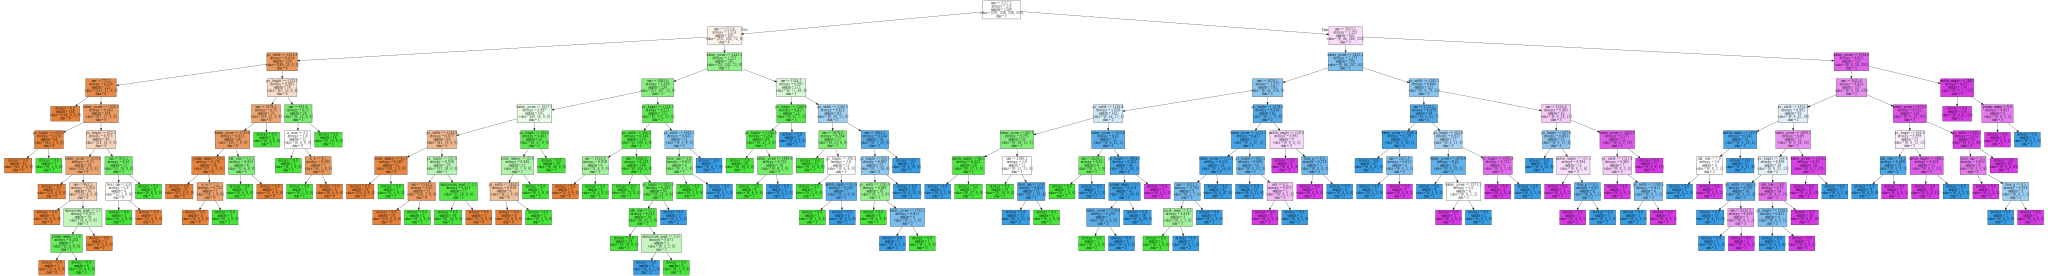

In [15]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['0','1','2','3'],
                                    filled=True))

display(SVG(graph.pipe(format='svg')))#здесь получается дерево покрупнее


Вернёмся к нашей задаче - убедимся, что у нас есть проблемы с тем деревом, которое мы получили. Потому что на самом деле тот факт, что наше дерево глубокое и большое вообще в каком-то смысле может и не сигнализировать о проблеме.

Может быть закономерность настолько сложная, что описать её деревом меньших масштабов никак не получится. Давайте это проверим.

Проверить это можно сравнив насколько хорошо наше дерево предсказывает правильные ответы на обучающей выборке(train множестве) и насколько хорошо - на тестовой. Это очень упрощённая версия валидации модели.

У классификатора есть метод score, предсказывающий число правильных ответов.

In [16]:
clf.score(X_train,y_train)

1.0

В 100% случаев мы правильно классифицировали все наши наблюдения на обучающей выборке.
А теперь посмотрим на тестовой выборке, на тех данных, которые наш классификатор не видел.

In [17]:
clf.score(X_test,y_test)

0.8227272727272728

Здесь нужно обратить внимание на большую разницу в полученных значениях на обучащей и тестовой выборках.

Большая разница в значениях говорит об overfitting

ограничим глубину дерева:


In [18]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [20]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [22]:
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.759090909090909

In [23]:
clf.score(X_train,y_train)

0.8044776119402985

In [24]:
clf.score(X_test,y_test)

0.759090909090909

эффективный подбор параметров

In [23]:
max_depth_values = range(1,100)
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    temp_score_data = pd.DataFrame({'max_depth':[max_depth],'train_score':[train_score],'test_score':[test_score]})
    scores_data = scores_data.append(temp_score_data)
scores_data

,max_depth,train_score,test_score
0,1,0.495522,0.509091
0,2,0.761940,0.763636
0,3,0.761940,0.763636
0,4,0.804478,0.759091
0,5,0.886567,0.807576
...,...,...,...
0,95,1.000000,0.830303
0,96,1.000000,0.834848
0,97,1.000000,0.821212
0,98,1.000000,0.828788


In [24]:
scores_data_long = pd.melt(scores_data,id_vars='max_depth',value_vars=['train_score','test_score'],
                         var_name='set_type', value_name='score')

In [25]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.495522
1,2,train_score,0.761940
2,3,train_score,0.761940
3,4,train_score,0.804478
4,5,train_score,0.886567
...,...,...,...
193,95,test_score,0.830303
194,96,test_score,0.834848
195,97,test_score,0.821212
196,98,test_score,0.828788


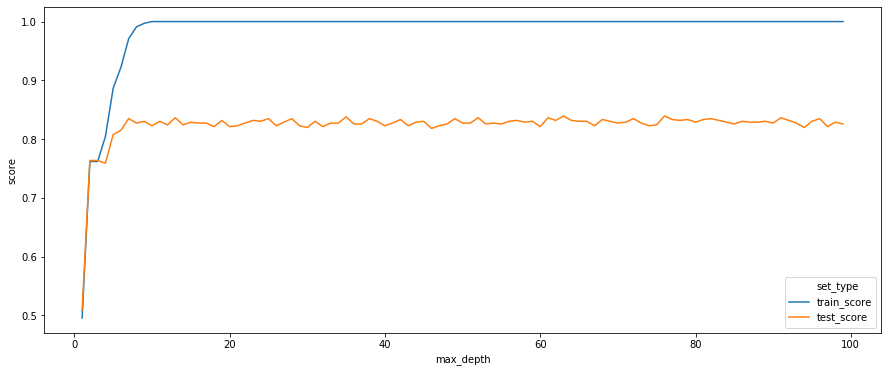

In [26]:
plt.figure(figsize=(15, 6))
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

## обучение на кросс-валидации

In [27]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
cross_val_score(clf, X_train, y_train, cv=5)

array([0.78888889, 0.77695167, 0.80297398, 0.7406015 , 0.7481203 ])

In [28]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7715072687915576

In [29]:
# пока варьируем только глубину дерева, за другие параметры не хватался
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [30]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.495522,0.509091,0.494021
0,2,0.761940,0.763636,0.755841
0,3,0.761940,0.763636,0.755841
0,4,0.804478,0.759091,0.771507
0,5,0.886567,0.807576,0.819349


In [31]:
scores_data_long = pd.melt(scores_data,id_vars='max_depth',value_vars=['train_score','test_score','cross_val_score'],
                         var_name='set_type', value_name='score')
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.495522
1,2,train_score,0.761940
2,3,train_score,0.761940
3,4,train_score,0.804478
4,5,train_score,0.886567
...,...,...,...
292,95,cross_val_score,0.837263
293,96,cross_val_score,0.840952
294,97,cross_val_score,0.828293
295,98,cross_val_score,0.838034


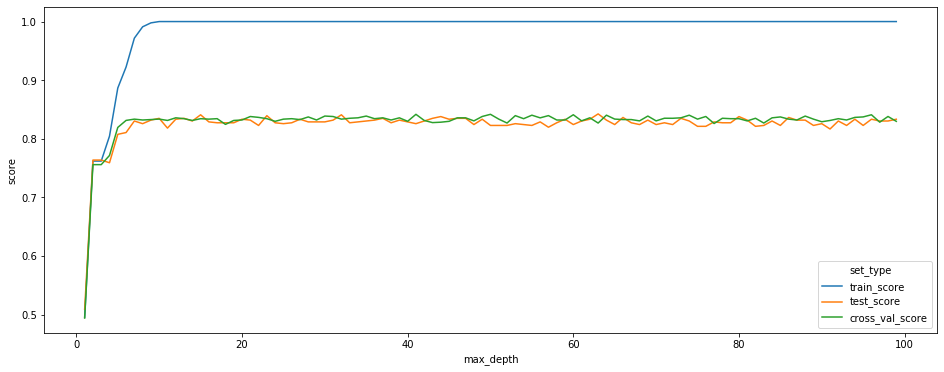

In [32]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [33]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.494021
199,2,cross_val_score,0.755841
200,3,cross_val_score,0.755841
201,4,cross_val_score,0.771507
202,5,cross_val_score,0.819349
203,6,cross_val_score,0.831314
204,7,cross_val_score,0.833489
205,8,cross_val_score,0.832016
206,9,cross_val_score,0.832762
207,10,cross_val_score,0.833573


In [34]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9)
cross_val_score(best_clf, X_test, y_test , cv=5).mean()

0.8166601519706225

это что показывает лучший классификатор на кросс-валидации(после тюнинга только глубины) 

подбор параметров GridSearchem

Теперь задание - осуществите перебор всех деревьев на данных ириса по следующим параметрам:

максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10

и сохраните в переменную best_tree лучшее дерево. Переменную с GridSearchCV назовите search

## обучение древа и подборка лучшей модели гридом

In [35]:
from sklearn.model_selection import GridSearchCV 
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
parameters = {'max_depth':range(1,30), 'min_samples_split':range(2,11),\
           'min_samples_leaf':range(1,11)}

In [36]:
grid_search_cv_clf = GridSearchCV(clf, parameters, n_jobs=-1, cv=5, verbose=1)
np.random.seed(42)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

Fitting 5 folds for each of 2610 candidates, totalling 13050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 1318 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 3318 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 6118 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 9718 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 13050 out of 13050 | elapsed:  4.2min finished


{'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 6}

In [37]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test,y_test)

0.8393939393939394

предсказываем ответы

In [38]:
y_pred = best_clf.predict(X_test)
#y_pred.shape
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)

conf_matrix


array([[149,  20,   0,   0],
       [ 14, 131,  17,   0],
       [  0,  20, 126,  16],
       [  0,   0,  19, 148]], dtype=int64)

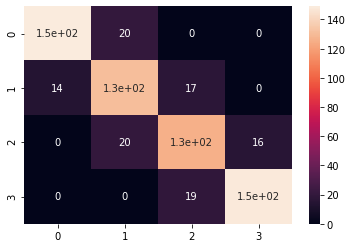

In [39]:
import seaborn as sns
sns.heatmap(conf_matrix,annot=True)

## оценка модели (метрики качества)

вот встал вопрос как посчитать precision, accuracy если классов 4, гуглим sklearn
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

In [40]:
from sklearn.metrics import precision_score, recall_score

X_test = mobiles_test
#y_pred=best_clf.predict(X_test)

In [41]:
precision_score(y_test, y_pred, average='macro')

0.8401022757402259

In [42]:
precision_score(y_test, y_pred, average='weighted')

0.8413594587996251

In [43]:
recall_score(y_test, y_pred, average='weighted')

0.8393939393939394

с деревом решений вроде все, переходим к случайному лесу

## теперь посмотрим случайный лес

In [44]:
X = mobiles_train.drop('price_range', axis=1)
y = mobiles_train.price_range
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)
print('X_train : ' + str(X_train.shape))
print('X_test : ' + str(X_test.shape))
print('y_train : ' + str(y_train.shape))
print('y_test : ' + str(y_test.shape))
#хочу отметить что я не пользовался тестовой выборкой, это очень плохо


X_train : (1340, 20)
X_test : (660, 20)
y_train : (1340,)
y_test : (660,)


In [45]:
from sklearn.ensemble import RandomForestClassifier
# сначала пробный фиттинг
np.random.seed(0)
rf = RandomForestClassifier(10,max_depth=5)

In [46]:
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.06612605, 0.00442904, 0.02128634, 0.00154374, 0.02117401,
       0.00898381, 0.01932311, 0.01243162, 0.02195582, 0.01011714,
       0.01597816, 0.06323483, 0.02898016, 0.65767669, 0.01128986,
       0.01687063, 0.01272594, 0.        , 0.00278278, 0.00309027])

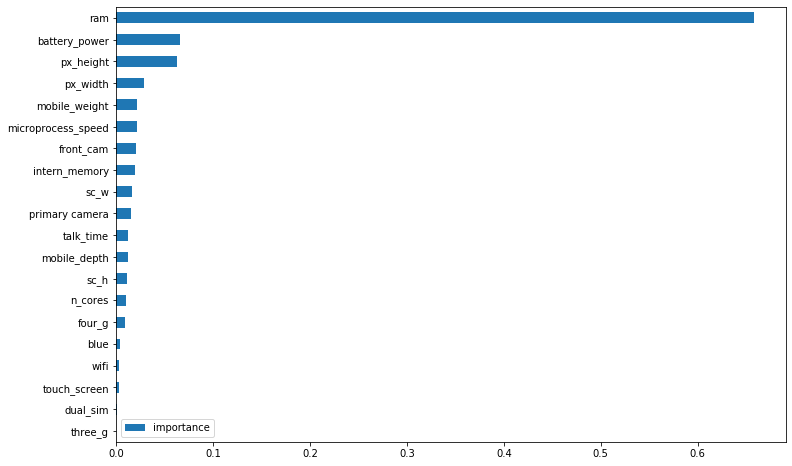

In [47]:
imp = pd.DataFrame(rf.feature_importances_ , index = X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh',figsize=(12,8))

## выберем лучшую модель gridsearchem


In [48]:
from sklearn.model_selection import GridSearchCV 
rf = RandomForestClassifier(random_state=0)
parameters = {'n_estimators':[x for x in range(10,50+1,10)],'max_depth':[x for x in range(1,12+1,2)],\
           'min_samples_leaf':[x for x in range(1,7+1)],'min_samples_split':range(2,9+1,2)}
grid_rf = GridSearchCV(rf,parameters,n_jobs=-1,cv=3,verbose=1)
grid_rf.fit(X_train,y_train)

Fitting 3 folds for each of 840 candidates, totalling 2520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2488 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed:  3.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max

In [49]:
best_rf = grid_rf.best_estimator_
best_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [50]:
imp = pd.DataFrame(best_rf.feature_importances_ , index=X_train.columns , columns=['importance'])
imp.sort_values('importance',ascending=False)

,importance
ram,0.543187
battery_power,0.076911
px_height,0.052501
px_width,0.052430
mobile_weight,0.034759
intern_memory,0.033283
primary camera,0.025583
talk_time,0.025480
microprocess_speed,0.024094
sc_w,0.023317


In [51]:
y_pred = best_rf.predict(X_test)
predictions = pd.Series(y_pred).value_counts()
predictions

1    176
3    167
0    164
2    153
dtype: int64

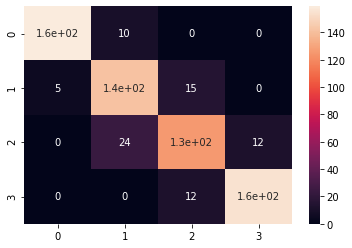

In [52]:
y_pred = best_rf.predict(X_test)
#y_pred.shape
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

In [53]:
precision_score(y_test,y_pred,average='weighted')

0.8832785926303598

In [54]:
recall_score(y_test,y_pred,average='weighted')

0.8818181818181818

In [55]:
#roc-auc тоже надо посчитать


## обучение модели knn

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [57]:
knn.score(X_test, y_test)

0.9333333333333333

In [58]:
parameters = {'weights':['distance','uniform']}
grid_knn = GridSearchCV(knn,parameters,n_jobs=-1,cv=3,verbose=1)
grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'weights': ['distance', 'uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [59]:
best_knn = grid_knn.best_estimator_
#AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

#imp = pd.DataFrame(best_knn.feature_importances_ , index=X_train.columns , columns=['importance'])
#imp.sort_values('importance',ascending=False)

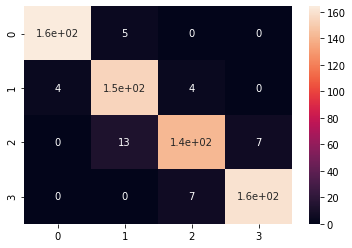

In [60]:
y_pred = best_knn.predict(X_test)
#y_pred.shape
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix
import seaborn as sns
sns.heatmap(conf_matrix,annot=True)

In [61]:
y_pred = best_knn.predict(X_test)
y_pred = pd.Series(y_pred)
y_pred.value_counts()

1    172
0    168
3    167
2    153
dtype: int64

In [62]:
precision_score(y_test, y_pred, average='macro')
precision_score(y_test, y_pred, average='weighted')

0.9399630958796485

In [63]:
recall_score(y_test, y_pred, average='weighted')

0.9393939393939394

In [64]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)#target_names=['Non-churned', 'Churned']#)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       169
           1       0.90      0.95      0.92       162
           2       0.93      0.88      0.90       162
           3       0.96      0.96      0.96       167

    accuracy                           0.94       660
   macro avg       0.94      0.94      0.94       660
weighted avg       0.94      0.94      0.94       660



In [65]:
#roc-auc тоже надо посчитать
#roc-auc не работает для многоклассовой классификации
#from sklearn.metrics import roc_auc_score
#roc_auc_score(y_test,y_pred)

## все остальные методы одним разом

In [67]:
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
# Performance metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression, SGDClassifier

gnb = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=1)
MNB = MultinomialNB()
BNB = BernoulliNB()
LR = LogisticRegression()
SDG = SGDClassifier()
SVC = SVC()
LSVC = LinearSVC()
NSVC = NuSVC()

In [69]:
# Training/ Test Split

X = mobiles_train.drop('price_range', axis=1)
y = mobiles_train.price_range
x1,x2,y1,y2 =  train_test_split(X, y, test_size=0.33, random_state=42)
#print the shape of training and test splits 
print(x1.shape)
print(x2.shape)
print(y1.shape)
print(y2.shape)

(1340, 20)
(660, 20)
(1340,)
(660,)


In [70]:
# Train our classifier and test predict
gnb.fit(x1, y1)
y2_GNB_model = gnb.predict(x2)
print("GaussianNB Accuracy :", accuracy_score(y2, y2_GNB_model))

KNN.fit(x1,y1)
y2_KNN_model = KNN.predict(x2)
print("KNN Accuracy :", accuracy_score(y2, y2_KNN_model))

#MNB.fit(x1,y1)
#y2_MNB_model = MNB.predict(x2)
#print("MNB Accuracy :", accuracy_score(y2, y2_MNB_model))

BNB.fit(x1,y1)
y2_BNB_model = BNB.predict(x2)
print("BNB Accuracy :", accuracy_score(y2, y2_BNB_model))

LR.fit(x1,y1)
y2_LR_model = LR.predict(x2)
print("LR Accuracy :", accuracy_score(y2, y2_LR_model))

SDG.fit(x1,y1)
y2_SDG_model = SDG.predict(x2)
print("SDG Accuracy :", accuracy_score(y2, y2_SDG_model))

SVC.fit(x1,y1)
y2_SVC_model = SVC.predict(x2)
print("SVC Accuracy :", accuracy_score(y2, y2_SVC_model))

LSVC.fit(x1,y1)
y2_LSVC_model = LSVC.predict(x2)
print("LSVC Accuracy :", accuracy_score(y2, y2_LSVC_model))

NSVC.fit(x1,y1)
y2_NSVC_model = NSVC.predict(x2)
print("NSVC Accuracy :", accuracy_score(y2, y2_NSVC_model))

GaussianNB Accuracy : 0.8045454545454546
KNN Accuracy : 0.9090909090909091
BNB Accuracy : 0.23636363636363636


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LR Accuracy : 0.7893939393939394
SDG Accuracy : 0.4803030303030303


C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC Accuracy : 0.26666666666666666


C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


LSVC Accuracy : 0.5045454545454545
NSVC Accuracy : 0.26666666666666666
